# Gráficas de entropía de tranferencia simbólica - experimentos de validación

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import os

### Opciones de graficación
Estética de las gráficas

In [2]:
sns.set_style("darkgrid")                          # Malla blanca
sns.set_context("paper", font_scale = 1.5)         # Tamaño de fuente en el contexto de un "paper"

In [3]:
formatter = tkr.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))

## Archivos

In [4]:
ruta = "datos_entropia_validacion/"
lista_archivos = [a for a in os.listdir(ruta) if a.endswith(".csv")]
lista_xy = sorted([a for a in lista_archivos if a.startswith("ets_xy")])
lista_yx = sorted([a for a in lista_archivos if a.startswith("ets_yx")])

## Parámetros de construcción para las matrices de datos

In [5]:
ncasos = len(lista_xy)                            # Casos de relaciones de causalidad
nt = np.loadtxt(ruta + lista_xy[0]).shape[1] - 1  # Numero de pasos de retraso en el tiempo
nr = np.loadtxt(ruta + lista_xy[0]).shape[0]      # Numero de realizaciones de cada caso
t = np.linspace(1, nt, nt)                        # Tiempo

In [6]:
ruta + lista_xy[0]

'datos_entropia_validacion/ets_xy00.csv'

## Inicialización de las matrices de datos

In [7]:
matriz_xy_promedio = np.empty((ncasos, nt))
matriz_yx_promedio = np.empty((ncasos, nt))
matriz_xyyx_promedio = np.empty((ncasos, nt))
matriz_yxxy_promedio = np.empty((ncasos, nt))
                              
matriz_xy_error = np.empty((ncasos, nt))
matriz_yx_error = np.empty((ncasos, nt))
matriz_xyyx_error = np.empty((ncasos, nt))
matriz_yxxy_error = np.empty((ncasos, nt))

## Construcción de las matrices de datos

In [8]:
for c in range(ncasos):
    xy = np.loadtxt(ruta + lista_xy[c])[:, 1:]
    yx = np.loadtxt(ruta + lista_yx[c])[:, 1:]
    
    matriz_xy_promedio[c] = xy.mean(axis = 0)
    matriz_yx_promedio[c] = yx.mean(axis = 0)
    matriz_xyyx_promedio[c] = (xy - yx).mean(axis = 0)
    matriz_yxxy_promedio[c] = (yx - xy).mean(axis = 0)
    
    matriz_xy_error[c] = xy.std(axis = 0, ddof = 1) / np.sqrt(nr)
    matriz_yx_error[c] = yx.std(axis = 0, ddof = 1) / np.sqrt(nr)
    matriz_xyyx_error[c] = (xy - yx).std(axis = 0, ddof = 1) / np.sqrt(nr)
    matriz_yxxy_error[c] = (yx - xy).std(axis = 0, ddof = 1) / np.sqrt(nr)

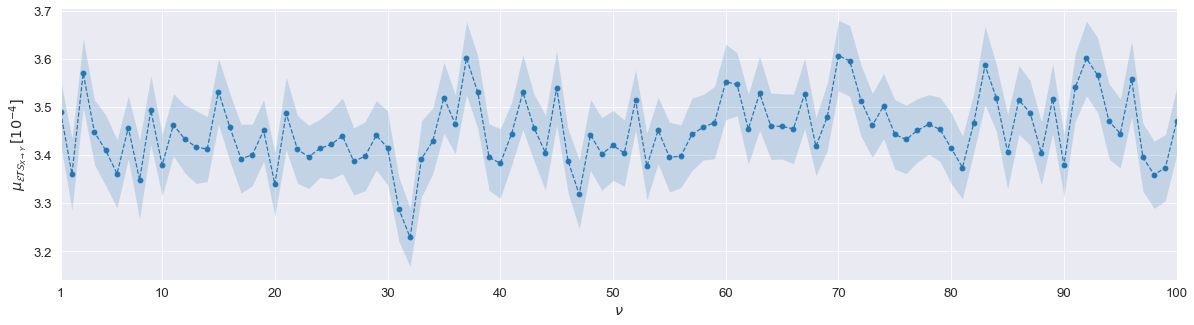

In [9]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{X \\rightarrow Y}} \\, [10^{-4}]$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xy_promedio[0] * 10000, "o--")
plt.fill_between(t, (matriz_xy_promedio[0] - matriz_xy_error[0]) * 10000, (matriz_xy_promedio[0] + matriz_xy_error[0]) * 10000, alpha = 0.2)
plt.savefig("grafica_validacion/ets_xy_experimento0.pdf", bbox_inches = "tight")
plt.show()

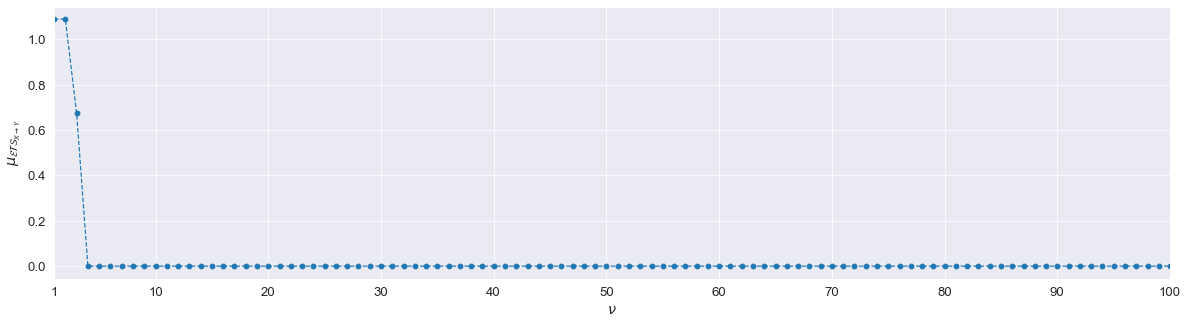

In [10]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{X \\rightarrow Y}}$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xy_promedio[1], "o--")
plt.fill_between(t, matriz_xy_promedio[1] - matriz_xy_error[1], matriz_xy_promedio[1] + matriz_xy_error[1], alpha = 0.2)
plt.savefig("grafica_validacion/ets_xy_experimento1.pdf", bbox_inches = "tight")
plt.show()

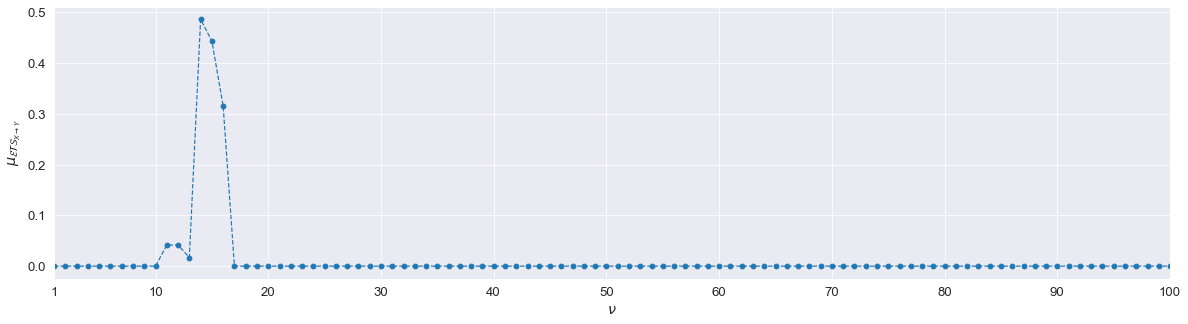

In [11]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{X \\rightarrow Y}}$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xy_promedio[2], "o--")
plt.fill_between(t, matriz_xy_promedio[2] - matriz_xy_error[2], matriz_xy_promedio[2] + matriz_xy_error[2], alpha = 0.2)
plt.savefig("grafica_validacion/ets_xy_experimento2.pdf", bbox_inches = "tight")
plt.show()

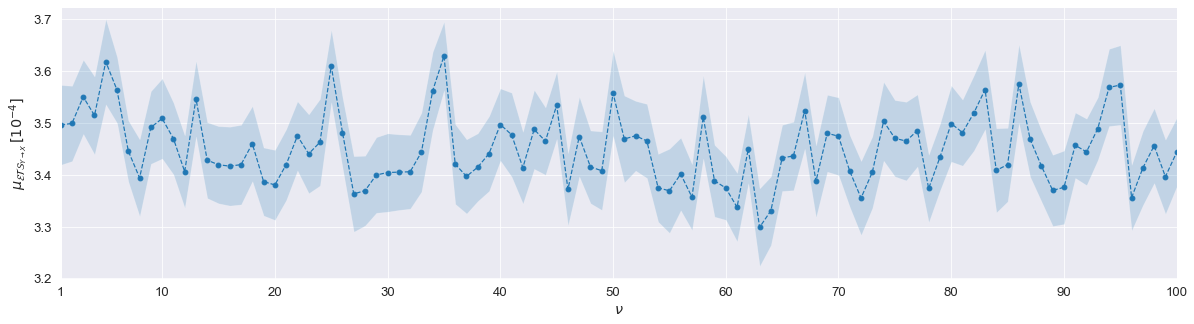

In [12]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{Y \\rightarrow X}} \\, [10^{-4}]$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_yx_promedio[0] * 10000, "o--")
plt.fill_between(t, (matriz_yx_promedio[0] - matriz_yx_error[0]) * 10000, (matriz_yx_promedio[0] + matriz_yx_error[0]) * 10000, alpha = 0.2)
plt.savefig("grafica_validacion/ets_yx_experimento0.pdf", bbox_inches = "tight")
plt.show()

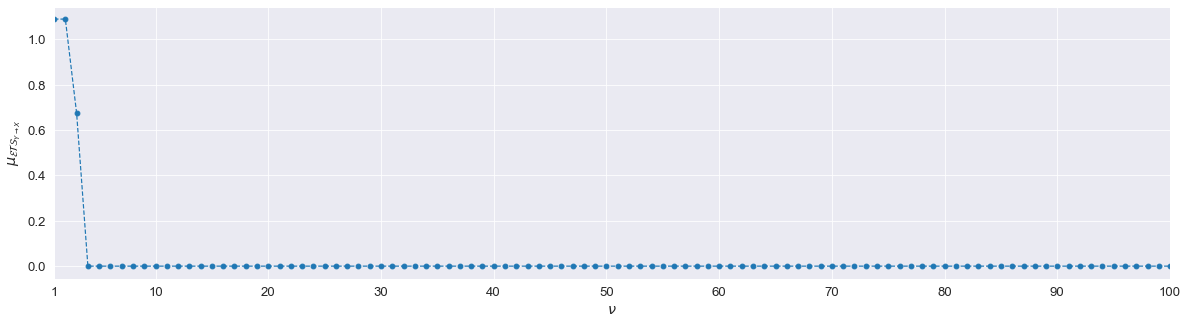

In [13]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{Y \\rightarrow X}}$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_yx_promedio[1], "o--")
plt.fill_between(t, matriz_yx_promedio[1] - matriz_yx_error[1], matriz_yx_promedio[1] + matriz_yx_error[1], alpha = 0.2)
plt.savefig("grafica_validacion/ets_yx_experimento1.pdf", bbox_inches = "tight")
plt.show()

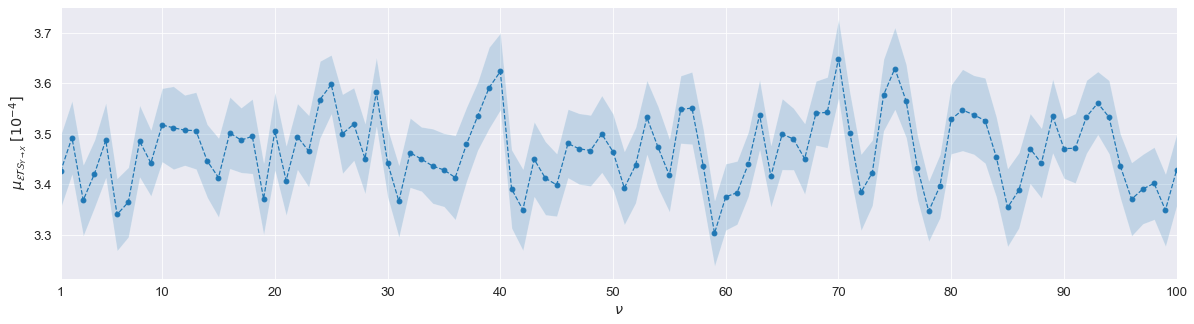

In [14]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\mathcal{ETS}_{Y \\rightarrow X}} \; [10^{-4}]$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_yx_promedio[2] * 10000, "o--")
plt.fill_between(t, (matriz_yx_promedio[2] - matriz_yx_error[2]) * 10000, (matriz_yx_promedio[2] + matriz_yx_error[2]) * 10000, alpha = 0.2)
plt.savefig("grafica_validacion/ets_yx_experimento2.pdf", bbox_inches = "tight")
plt.show()

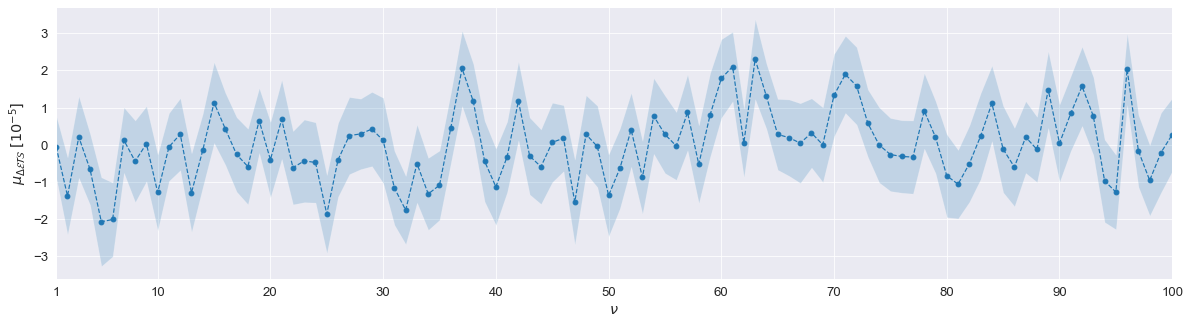

In [15]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\Delta \\mathcal{ETS}} \; [10^{-5}]$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xyyx_promedio[0] * 100000, "o--")
plt.fill_between(t, 
                 (matriz_xyyx_promedio[0] - matriz_xyyx_error[0]) * 100000,
                 (matriz_xyyx_promedio[0] + matriz_xyyx_error[0]) * 100000, 
                 alpha = 0.2)
plt.savefig("grafica_validacion/ets_xyyx_experimento0.pdf", bbox_inches = "tight")
plt.show()

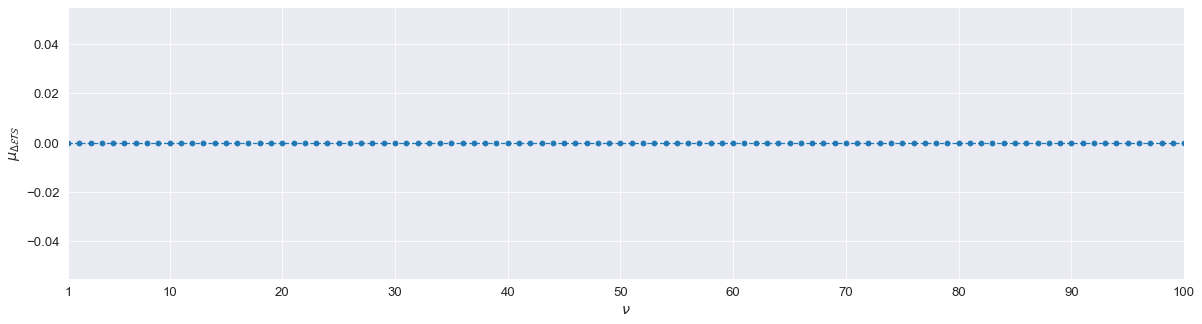

In [16]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\Delta \\mathcal{ETS}}$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xyyx_promedio[1], "o--")
plt.fill_between(t, 
                 (matriz_xyyx_promedio[1] - matriz_xyyx_error[1]),
                 (matriz_xyyx_promedio[1] + matriz_xyyx_error[1]), 
                 alpha = 0.2)
plt.savefig("grafica_validacion/ets_xyyx_experimento1.pdf", bbox_inches = "tight")
plt.show()

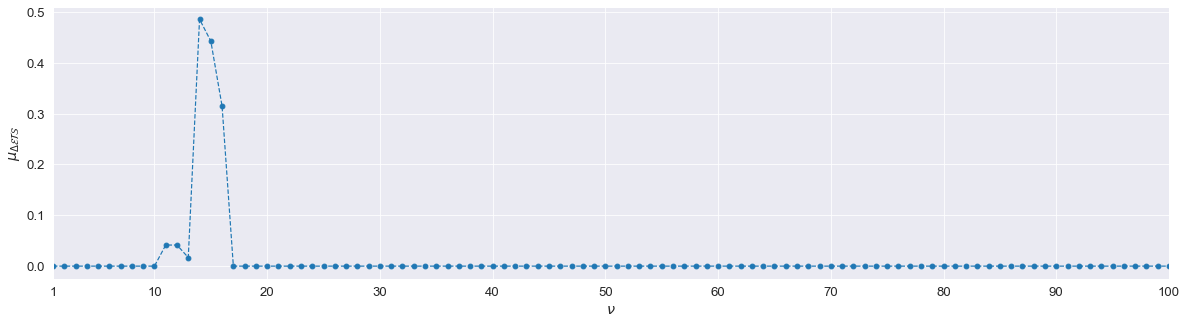

In [17]:
plt.figure(figsize  = (20, 5))
plt.xlabel("$\\nu$")
plt.ylabel("$\\mu_{\\Delta \\mathcal{ETS}}$")
plt.xlim(1, 100)
plt.xticks([1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.plot(t, matriz_xyyx_promedio[2], "o--")
plt.fill_between(t, 
                 (matriz_xyyx_promedio[2] - matriz_xyyx_error[2]),
                 (matriz_xyyx_promedio[2] + matriz_xyyx_error[2]), 
                 alpha = 0.2)
#plt.savefig("grafica_validacion/ets_xyyx_experimento2.pdf", bbox_inches = "tight")
plt.show()